In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
fig, axes = plt.subplots(1, len(df.columns), figsize=(120, 50))

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: >

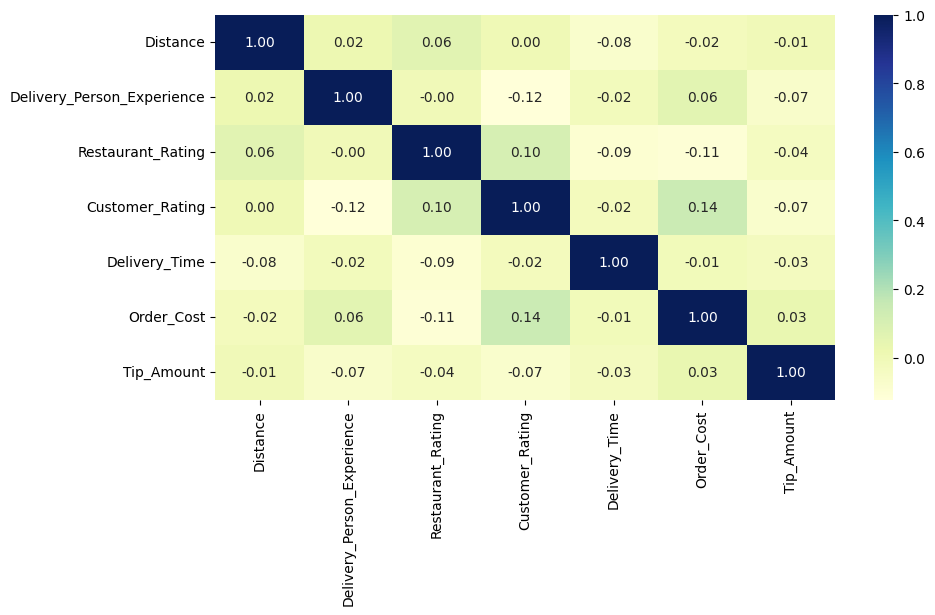

In [101]:
# Reason: ML models need numbers, not text
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,5)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")

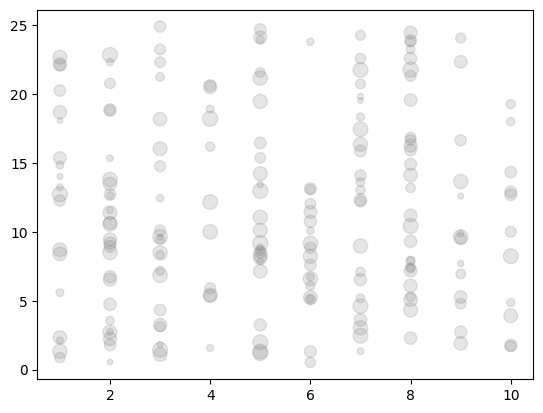

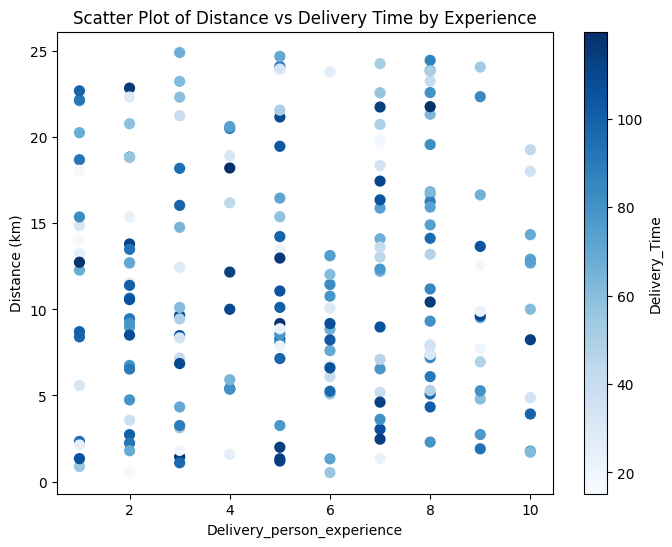

In [102]:
plt.scatter(df['Delivery_Person_Experience'],df['Distance'],df['Delivery_Time'], c='grey', alpha=0.2)
plt.show()

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    x=df['Delivery_Person_Experience'],      
    y=df['Distance'],
    c=df['Delivery_Time'],      # Color based on Time
    cmap='Blues',          # Colormap
    s=50,                   # Size of points
)
plt.colorbar(scatter, label='Delivery_Time')
plt.ylabel('Distance (km)')
plt.xlabel('Delivery_person_experience')
plt.title('Scatter Plot of Distance vs Delivery Time by Experience')
plt.show()

R² Score: -0.09958170947265632
MAE: 27.66671346364638
MSE: 956.6676022838623
RMSE: 30.93004368383372


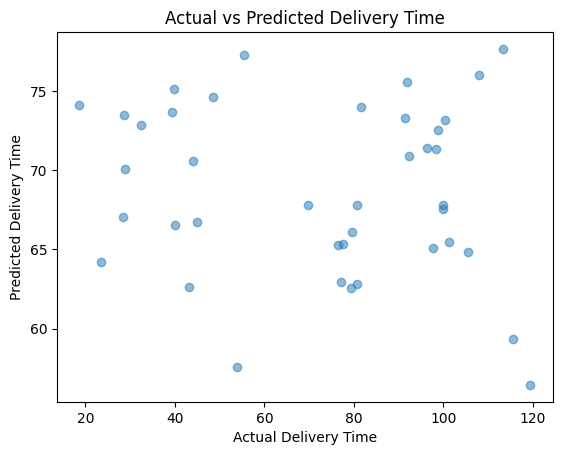

In [103]:
# Reason: X = predictors, y = what we want to predict
X = df_encoded.drop(columns=['Order_ID', 'Delivery_Time', 'Customer_Location','Restaurant_Location'])
y = df_encoded['Delivery_Time']

# print(X.head())

# Reason: To check model performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Reason: Makes all features on similar scale so model isn’t biased by larger numbers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualize actual vs predicted delivery times
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:
Accuracy: 0.6250
Precision (weighted): 0.4966
Recall (weighted): 0.6250
F1-score (weighted): 0.5327

Classification Report:
              precision    recall  f1-score   support

        Fast       0.00      0.00      0.00         5
      Medium       0.33      0.11      0.17         9
        Slow       0.65      0.92      0.76        26

    accuracy                           0.62        40
   macro avg       0.33      0.34      0.31        40
weighted avg       0.50      0.62      0.53        40


Confusion Matrix:


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classif

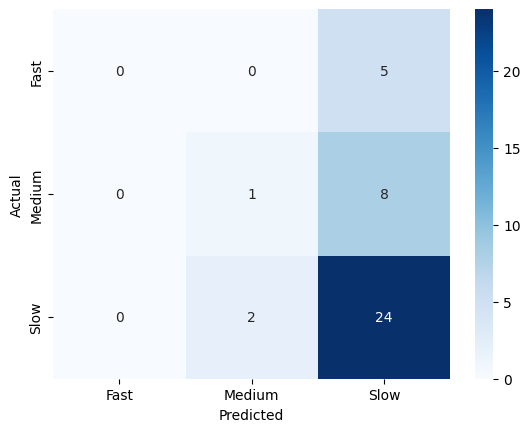

In [104]:
# Categorize delivery time into categories
def categorize_delivery(time):
    if time < 30:
        return "Fast"
    elif time <= 60:
        return "Medium"
    else:
        return "Slow"

df['Delivery_Category'] = df['Delivery_Time'].apply(categorize_delivery)
df_encoded['Delivery_Category'] = df_encoded['Delivery_Time'].apply(categorize_delivery)

# print(df_encoded['Delivery_Category'].value_counts())

# Features and Target
X = df_encoded.drop(columns=['Delivery_Category','Order_ID', 'Delivery_Time', 'Customer_Location','Restaurant_Location'])
y = df_encoded['Delivery_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Logistic Regression for multiclass classification
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=50000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Accuracy: 0.55
3        Slow
47       Slow
83       Slow
73       Slow
172      Slow
123      Slow
179      Slow
36       Slow
153      Slow
11       Slow
182    Medium
16       Fast
167      Slow
84       Slow
95       Slow
194      Slow
103      Fast
195    Medium
50     Medium
169      Slow
168    Medium
13     Medium
150      Slow
58       Fast
15     Medium
63       Slow
105      Slow
156      Fast
48       Slow
151    Medium
39       Slow
77       Slow
146      Slow
69       Slow
187      Slow
17       Slow
160      Slow
107      Fast
163    Medium
57     Medium
Name: Delivery_Category, dtype: object ['Slow' 'Slow' 'Medium' 'Slow' 'Slow' 'Slow' 'Slow' 'Slow' 'Slow' 'Slow'
 'Slow' 'Slow' 'Slow' 'Slow' 'Medium' 'Slow' 'Slow' 'Medium' 'Slow' 'Slow'
 'Slow' 'Slow' 'Slow' 'Slow' 'Slow' 'Medium' 'Slow' 'Slow' 'Slow' 'Slow'
 'Slow' 'Slow' 'Medium' 'Slow' 'Medium' 'Slow' 'Slow' 'Slow' 'Slow' 'Slow']


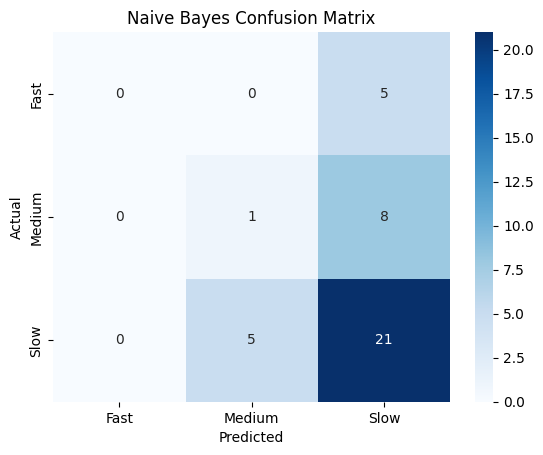

In [105]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(y_test, y_pred_nb)

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best K: 18 with accuracy: 0.6375
KNN Accuracy: 0.65
              precision    recall  f1-score   support

        Fast       0.00      0.00      0.00         5
      Medium       0.00      0.00      0.00         9
        Slow       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.22      0.33      0.26        40
weighted avg       0.42      0.65      0.51        40



c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

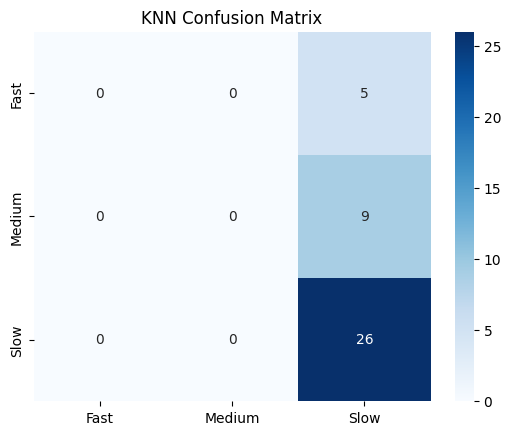

In [106]:
# Find best K
best_k, best_acc = 0, 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold CV
    if scores.mean() > best_acc:
        best_k, best_acc = k, scores.mean()

print("Best K:", best_k, "with accuracy:", best_acc)

# Final KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("KNN Confusion Matrix")
plt.show()

Best Parameters: {'max_depth': 3, 'min_samples_split': 5}
Decision Tree Accuracy: 0.575
              precision    recall  f1-score   support

        Fast       0.00      0.00      0.00         5
      Medium       0.25      0.11      0.15         9
        Slow       0.63      0.85      0.72        26

    accuracy                           0.57        40
   macro avg       0.29      0.32      0.29        40
weighted avg       0.46      0.57      0.50        40



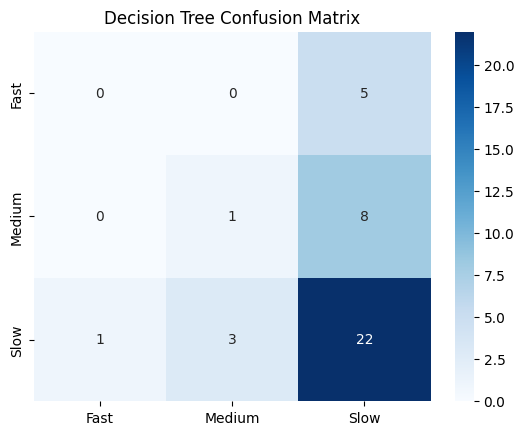

In [107]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# Train with best params
dt_best = grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", xticklabels=dt_best.classes_, yticklabels=dt_best.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [108]:
categorical_cols = ['Delivery_Category']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

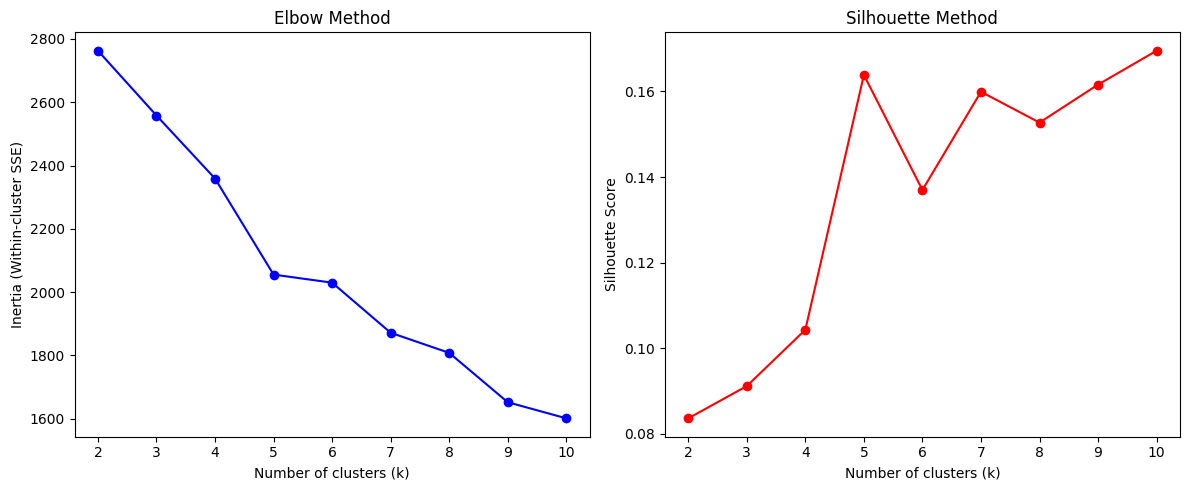

Best k based on Silhouette Score: 10
Max Silhouette Score: 0.1695278205772369


In [109]:
from sklearn.metrics import silhouette_score

# Assume your dataframe is df and pick features relevant for clustering
features = ['Distance',
     #    'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating',
         'Weather_Conditions_Cloudy', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
         'Traffic_Conditions_High', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
     #    'Order_Priority_High', 'Order_Priority_Low', 'Order_Priority_Medium', 
         'Order_Time_Afternoon', 'Order_Time_Evening', 'Order_Time_Morning', 'Order_Time_Night',
     #    'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
         'Delivery_Category_Fast', 'Delivery_Category_Medium', 'Delivery_Category_Slow']
X = df_encoded[features]

# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Elbow method
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
     kmeans = KMeans(n_clusters=k, random_state=21)
     kmeans.fit(X_scaled)
     inertia.append(kmeans.inertia_)
     silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")

plt.tight_layout()
plt.show()

# Step 2: Choose k based on the plots
# For automation, let's pick k with max silhouette score
best_k = K[silhouette.index(max(silhouette))]
print("Best k based on Silhouette Score:", best_k)
print("Max Silhouette Score:", max(silhouette))
# Step 3: Final clustering
final_kmeans = KMeans(n_clusters=best_k, random_state=21)
df_encoded['Cluster'] = final_kmeans.fit_predict(X_scaled)


In [110]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import plotly.express as px

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=21, n_init=1)
df_encoded['Cluster'] = kmeans.fit_predict(X_scaled)

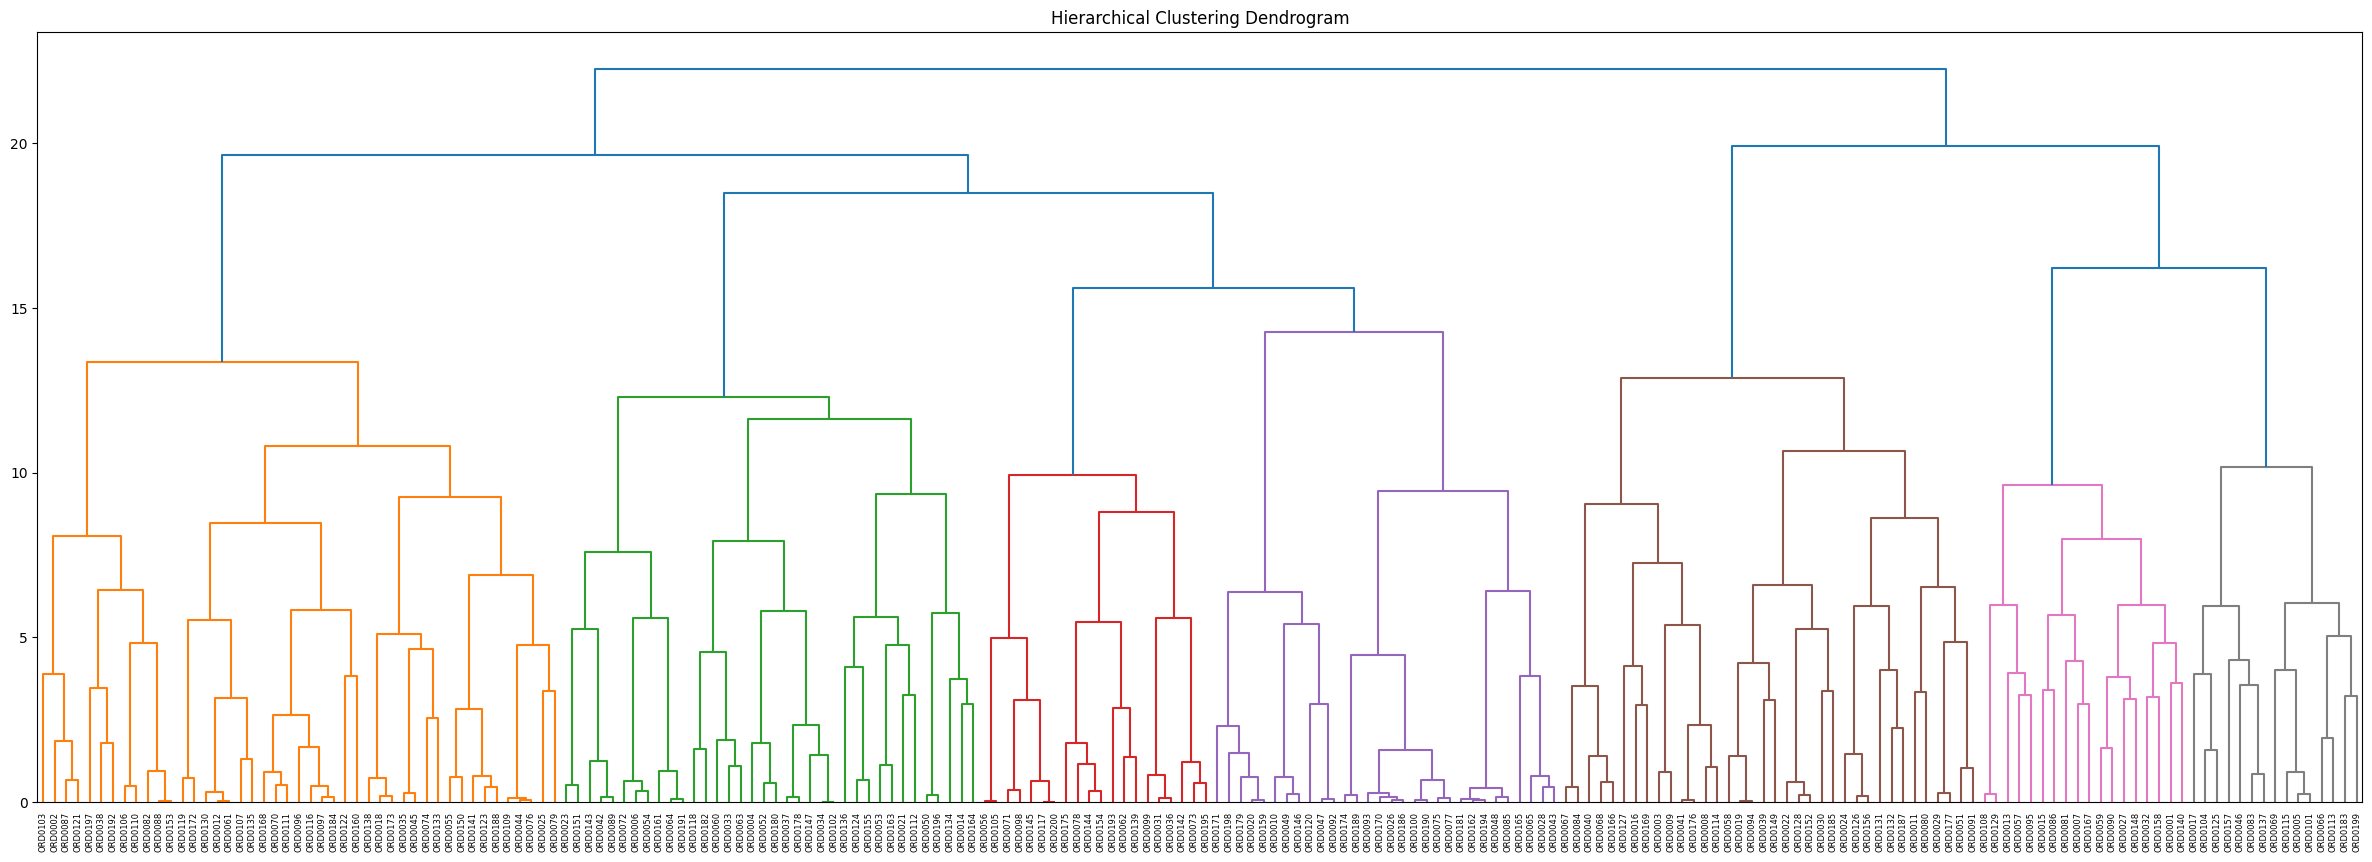

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Linkage matrix
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(30,10))
dendrogram(Z, labels=df_encoded['Order_ID'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_encoded['HierCluster'] = agg.fit_predict(X_scaled)

In [112]:
df_encoded

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,...,Order_Time_Morning,Order_Time_Night,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Delivery_Category_Fast,Delivery_Category_Medium,Delivery_Category_Slow,Cluster,HierCluster
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,4.1,3.0,26.22,1321.10,81.54,...,False,False,False,False,True,True,False,False,2,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,4.5,4.2,62.61,152.21,29.02,...,False,True,False,False,True,False,False,True,3,3
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,3.3,3.4,48.43,1644.38,64.17,...,False,True,False,True,False,False,True,False,0,2
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,3.2,3.7,111.63,541.25,79.23,...,False,False,False,True,False,False,False,True,4,4
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,3.5,2.8,32.38,619.81,2.34,...,False,True,False,True,False,False,True,False,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,8,4.7,4.0,50.39,1432.26,66.34,...,False,True,False,True,False,False,True,False,3,4
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,8,3.0,3.6,90.54,1720.25,40.27,...,False,True,True,False,False,False,False,True,0,3
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,4,2.9,3.4,73.20,1356.58,5.10,...,False,False,False,True,False,False,False,True,0,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,9,3.9,4.8,53.94,354.39,85.25,...,False,True,False,False,True,False,True,False,3,0


Cluster mapping (Hierarchical → KMeans): [2 1 0 3 4]


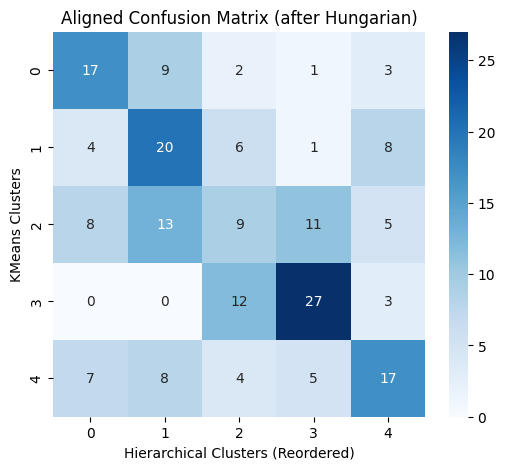

In [113]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

def aligned_confusion_matrix(labels1, labels2):
    cm = confusion_matrix(labels1, labels2)
    row_ind, col_ind = linear_sum_assignment(-cm)
    cm_aligned = cm[:, col_ind]
    return cm, cm_aligned, col_ind

cm, cm_aligned, mapping = aligned_confusion_matrix(df_encoded['Cluster'], df_encoded['HierCluster'])
print("Cluster mapping (Hierarchical → KMeans):", mapping)


# Plot aligned confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_aligned, annot=True, fmt="d", cmap="Blues")
plt.title("Aligned Confusion Matrix (after Hungarian)")
plt.xlabel("Hierarchical Clusters (Reordered)")
plt.ylabel("KMeans Clusters")
plt.show()


In [114]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df_encoded['Cluster'], df_encoded['HierCluster'])
nmi = normalized_mutual_info_score(df_encoded['Cluster'], df_encoded['HierCluster'])

print("ARI:", ari)
print("NMI:", nmi)


ARI: 0.14070215385022478
NMI: 0.1999992552061451


In [115]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=["Delivery_Time", "Order_ID", "Customer_Location", "Restaurant_Location", "Restaurant_Rating", "Customer_Rating", "Order_Cost", "Tip_Amount","Delivery_Category"])
y = df["Delivery_Category"]

# Convert categorical variables to dummy/one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(df["Delivery_Category"])
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Build Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))  # multiple classification

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=le.classes_))
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4844 - loss: 1.0636 - val_accuracy: 0.5625 - val_loss: 0.9709
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4453 - loss: 1.0232 - val_accuracy: 0.5000 - val_loss: 0.9348
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.0029 - val_accuracy: 0.5312 - val_loss: 0.9140
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5625 - loss: 0.9678 - val_accuracy: 0.6250 - val_loss: 0.9034
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5781 - loss: 0.9820 - val_accuracy: 0.6250 - val_loss: 0.8996
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5781 - loss: 0.8734 - val_accuracy: 0.6250 - val_loss: 0.8991
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6172 - loss: 0.9063 - val_accuracy: 0.6250 - val_loss: 0.8999
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6328 - loss: 0.8792 - val_accuracy: 0.6250 - val_loss: 0.9001


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
print(df.info())
print(df_encoded.info())
print(numeric_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [117]:
# Remove parentheses and split by comma
df[["Cust_Lat", "Cust_Lon"]] = df["Customer_Location"].str.strip("()").str.split(",", expand=True).astype(float)
df[["Rest_Lat", "Rest_Lon"]] = df["Restaurant_Location"].str.strip("()").str.split(",", expand=True).astype(float)

# Drop old string columns if not needed
df = df.drop(columns=["Customer_Location", "Restaurant_Location"])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Distance                    200 non-null    float64
 2   Weather_Conditions          200 non-null    object 
 3   Traffic_Conditions          200 non-null    object 
 4   Delivery_Person_Experience  200 non-null    int64  
 5   Order_Priority              200 non-null    object 
 6   Order_Time                  200 non-null    object 
 7   Vehicle_Type                200 non-null    object 
 8   Restaurant_Rating           200 non-null    float64
 9   Customer_Rating             200 non-null    float64
 10  Delivery_Time               200 non-null    float64
 11  Order_Cost                  200 non-null    float64
 12  Tip_Amount                  200 non-null    float64
 13  Delivery_Category           200 non

In [ ]:
if 'Delivery_Category' in df.columns:
	y_raw = df['Delivery_Category'].astype(str).str.strip().str.lower()
else:
	raise ValueError("No Delivery_Time or Delivery_Category column found for label.")

# Map categories → numeric labels
mapping = {
	'fast': 0,
	'medium': 1,
	'slow': 2
}

df['target_multi'] = y_raw.map(mapping)

# Optional: check if any values didn’t match
print("Unmapped values:", set(y_raw) - set(mapping.keys()))

df.head()


Unmapped values: set()


,Order_ID,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Delivery_Category,Cust_Lat,Cust_Lon,Rest_Lat,Rest_Lon,target_multi
0,ORD0001,1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,Fast,17.030479,79.743077,12.358515,85.100083,0
1,ORD0002,21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,Slow,15.398319,86.639122,14.174874,77.025606,2
2,ORD0003,6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,Medium,15.687342,83.888808,19.594748,82.048482,1
3,ORD0004,13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,Slow,20.415599,78.046984,16.915906,78.278698,2
4,ORD0005,6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,Medium,14.786904,78.706532,15.206038,86.203182,1


In [121]:
import os
from staticmap import StaticMap, CircleMarker, Line
from PIL import ImageDraw, ImageFont

os.makedirs("map_images", exist_ok=True)

def traffic_style(traffic_level):
    """Return (color, width, is_dashed, label) based on traffic condition"""
    traffic_level = str(traffic_level).lower()

    if "low" in traffic_level:
        return "#2ecc71", 2, "Low"
    elif "medium" in traffic_level:
        return "#f39c12", 4, "Medium"
    elif "high" in traffic_level:
        return "#e74c3c", 6, "High"
    else:
        return "#3498db", 3, "Unknown"  # default (blue)

def render_map_png_osm(c_lat, c_lon, r_lat, r_lon, traffic_level, out_path,
                       zoom=12, img_size=(1024, 1024)):

    # Base map
    m = StaticMap(img_size[0], img_size[1], url_template='http://a.tile.openstreetmap.org/{z}/{x}/{y}.png')

    # Traffic-dependent style
    color_hex, width, traffic_text = traffic_style(traffic_level)

    # ✅ Line (lon, lat order)
    coords = [(r_lon, r_lat), (c_lon, c_lat)]
    line = Line(coords, color_hex, width)
    m.add_line(line)

    # ✅ Markers
    m.add_marker(CircleMarker((r_lon, r_lat), '#c62828', 40))  # Restaurant (red)
    m.add_marker(CircleMarker((c_lon, c_lat), '#1976d2', 40))  # Customer (blue)

    # Render
    image = m.render(zoom=zoom)

    # ✅ Overlay text
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype("arial.ttf", 18)
    except:
        font = ImageFont.load_default()

    # Labels
    draw.text((20, img_size[1]-60), "Restaurant", fill=(200,0,0), font=font)
    draw.text((20, img_size[1]-35), "Customer", fill=(0,0,200), font=font)

    # Banner for traffic info
    banner_h = 28
    draw.rectangle([(0,0), (img_size[0], banner_h)], fill=(0,0,0,160))
    draw.text((8, 6), f"Traffic: {traffic_text}", fill=(255,255,255), font=font)

    draw.text((img_size[0]//2 - 100, img_size[1] - 40), "Restaurant", fill=(255,0,0), font=font)
    draw.text((img_size[0]//2 + 50, img_size[1] - 40), "Customer", fill=(0,0,255), font=font)

    image.save(out_path, format="PNG")


# Generate images and a dataframe of filepaths + labels
rows = []
for i, r in df.iterrows():
    (clat, clon) = r['Cust_Lat'], r['Cust_Lon']
    (rlat, rlon) = r['Rest_Lat'], r['Rest_Lon']
    tlev = r.get('Traffic_Conditions', 'Low')
    out_file = os.path.join("map_images", f"map_{i}.png")
    render_map_png_osm(clat, clon, rlat, rlon, tlev, out_file)
    rows.append({"filepath": out_file, "label": r['Delivery_Category']})

img_df = pd.DataFrame(rows)
img_df.head()


,filepath,label
0,map_images\map_0.png,Fast
1,map_images\map_1.png,Slow
2,map_images\map_2.png,Medium
3,map_images\map_3.png,Slow
4,map_images\map_4.png,Medium


In [122]:
train_df, test_df = train_test_split(img_df, test_size=0.2, random_state=42, stratify=img_df['label'])
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Keras generators
img_size = (224, 224)        # CNN input size
batch_size = 16

train_gen = ImageDataGenerator(rescale=1./255,
							   validation_split=0.2,
							   horizontal_flip=True,
							   zoom_range=0.1)

train_flow = train_gen.flow_from_dataframe(
	train_df, x_col='filepath', y_col='label',
	target_size=img_size, class_mode='categorical',  # returns float labels (0/1)
	batch_size=batch_size, shuffle=True, subset='training', seed=42
)

val_flow = train_gen.flow_from_dataframe(
	train_df, x_col='filepath', y_col='label',
	target_size=img_size, class_mode='categorical',
	batch_size=batch_size, shuffle=False, subset='validation', seed=42
)

test_gen = ImageDataGenerator(rescale=1./255)
test_flow = test_gen.flow_from_dataframe(
	test_df, x_col='filepath', y_col='label',
	target_size=img_size, class_mode='categorical',
	batch_size=batch_size, shuffle=False
)


Found 128 validated image filenames belonging to 3 classes.
Found 32 validated image filenames belonging to 3 classes.
Found 40 validated image filenames belonging to 3 classes.


In [123]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

tensorflow.keras.backend.clear_session()

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')   # binary output
])

model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_flow,
    validation_data=val_flow,
    epochs=25,
    callbacks=[es],
    verbose=1
)


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5000 - loss: 7.3912 - val_accuracy: 0.7500 - val_loss: 0.9529
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.4609 - loss: 1.2504 - val_accuracy: 0.6250 - val_loss: 1.0474
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/step - accuracy: 0.5625 - loss: 1.0821 - val_accuracy: 0.7500 - val_loss: 0.9562
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.6094 - loss: 0.9875 - val_accuracy: 0.7500 - val_loss: 0.7986
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.6094 - loss: 0.9638 - val_accuracy: 0.7500 - val_loss: 0.7932
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.6094 - loss: 1.0231 - val_accuracy: 0.7500 - val_loss: 0.9684
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.6094 - loss: 1.0074 - val_accuracy: 0.7500 - val_loss: 0.9608
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 0.6094 - loss: 0.9980 - val_accuracy: 0.7500 - val_loss: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step
CNN — Accuracy: 0.650 | Precision: 0.423 | Recall: 0.650 | F1: 0.512 | AUC: 0.516

Confusion Matrix:
 [[ 0  0  5]
 [ 0  0  9]
 [ 0  0 26]]


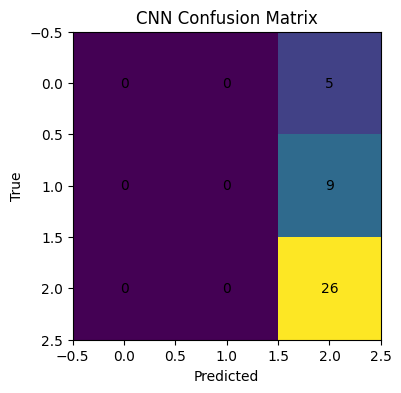

In [124]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_prob = model.predict(test_flow)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_flow.classes

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_true, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

y_true_bin = label_binarize(y_true, classes=[0,1,2])
auc = roc_auc_score(y_true_bin, y_prob, average='weighted', multi_class='ovr')


print(f"CNN — Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title('CNN Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
for (i,j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center')
plt.show()

# # ROC curve
# RocCurveDisplay.from_predictions(y_true, y_prob)
# plt.title("CNN ROC")
# plt.show()


In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer

# Build a compact tabular frame
tab = df[['Distance', 'Weather_Conditions', 'Traffic_Conditions', 'Order_Time', 'Order_Priority', 'Delivery_Category']].dropna().copy()

X_tab = tab.drop(columns=['Delivery_Category'])
y_tab = tab['Delivery_Category']

# column types
cat_cols = X_tab.select_dtypes(include=['object']).columns.tolist()
num_cols = X_tab.select_dtypes(exclude=['object']).columns.tolist()

pre = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('scaler', StandardScaler(), num_cols)
])

logreg = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(max_iter=1000))
])

rf = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_scores(pipe, X, y):
    accs, precs, recs, f1s = [], [], [], []
    for tr, te in skf.split(X, y):
        Xtr, Xte = X.iloc[tr], X.iloc[te]
        ytr, yte = y.iloc[tr], y.iloc[te]
        pipe.fit(Xtr, ytr)
        yp = pipe.predict(Xte)
        accs.append(accuracy_score(yte, yp))
        precs.append(precision_score(yte, yp, average='weighted', zero_division=0))
        recs.append(recall_score(yte, yp, average='weighted', zero_division=0))
        f1s.append(f1_score(yte, yp, average='weighted', zero_division=0))
    return (np.mean(accs), np.mean(precs), np.mean(recs), np.mean(f1s))

lr_acc, lr_prec, lr_rec, lr_f1 = cv_scores(logreg, X_tab, y_tab)
rf_acc, rf_prec, rf_rec, rf_f1 = cv_scores(rf, X_tab, y_tab)

print(f"LogReg (5-fold) — Acc: {lr_acc:.3f} | Prec: {lr_prec:.3f} | Rec: {lr_rec:.3f} | F1: {lr_f1:.3f}")
print(f"RandForest (5-fold) — Acc: {rf_acc:.3f} | Prec: {rf_prec:.3f} | Rec: {rf_rec:.3f} | F1: {rf_f1:.3f}")


LogReg (5-fold) — Acc: 0.615 | Prec: 0.420 | Rec: 0.615 | F1: 0.494
RandForest (5-fold) — Acc: 0.570 | Prec: 0.466 | Rec: 0.570 | F1: 0.504


In [126]:

print("\n=== Model Comparison (hold-out CNN vs 5-fold tabular) ===")
print(f"CNN — Acc: {acc:.3f}, Prec: {prec:.3f}, Rec: {rec:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")
print(f"LogReg — Acc: {lr_acc:.3f}, Prec: {lr_prec:.3f}, Rec: {lr_rec:.3f}, F1: {lr_f1:.3f}")
print(f"RF    — Acc: {rf_acc:.3f}, Prec: {rf_prec:.3f}, Rec: {rf_rec:.3f}, F1: {rf_f1:.3f}")
#!/usr/bin/env python3


=== Model Comparison (hold-out CNN vs 5-fold tabular) ===
CNN — Acc: 0.650, Prec: 0.423, Rec: 0.650, F1: 0.512, AUC: 0.516
LogReg — Acc: 0.615, Prec: 0.420, Rec: 0.615, F1: 0.494
RF    — Acc: 0.570, Prec: 0.466, Rec: 0.570, F1: 0.504
